In [12]:
import pandas as pd
import numpy as np

# Load dataset Titanic
df = pd.read_csv('/content/titanic.csv')  # ganti path kalau di Colab
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **1. HIPOTESA AWAL**

In [13]:
# Hipotesa awal
print("""
Hipotesa:
1. Penumpang dengan tiket kelas 1 memiliki kemungkinan selamat lebih besar dibanding kelas 3.
2. Penumpang perempuan memiliki kemungkinan selamat lebih tinggi dibanding laki-laki.
3. Penumpang yang lebih muda (anak-anak) memiliki peluang selamat lebih besar.
""")



Hipotesa:
1. Penumpang dengan tiket kelas 1 memiliki kemungkinan selamat lebih besar dibanding kelas 3.
2. Penumpang perempuan memiliki kemungkinan selamat lebih tinggi dibanding laki-laki.
3. Penumpang yang lebih muda (anak-anak) memiliki peluang selamat lebih besar.



# **2. Exploratory Data Analysis (EDA)**

In [17]:
# Ukuran dan info awal
print("Ukuran data:", df.shape)
print("\nInfo kolom:")
df.info()

# Statistik deskriptif
df.describe(include='all')


Ukuran data: (891, 12)

Info kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          0 non-null      float64
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     0 non-null      float64
dtypes: float64(4), int64(5), object(3)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,0.0,891.000000,891.000000,891.000000,891,891.000000,204,0.0
unique,NaN,NaN,NaN,891,NaN,NaN,NaN,NaN,681,NaN,147,NaN
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",NaN,NaN,NaN,NaN,347082,NaN,G6,NaN
freq,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,7,NaN,4,NaN
mean,446.000000,0.383838,2.308642,NaN,NaN,29.361582,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.019697,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


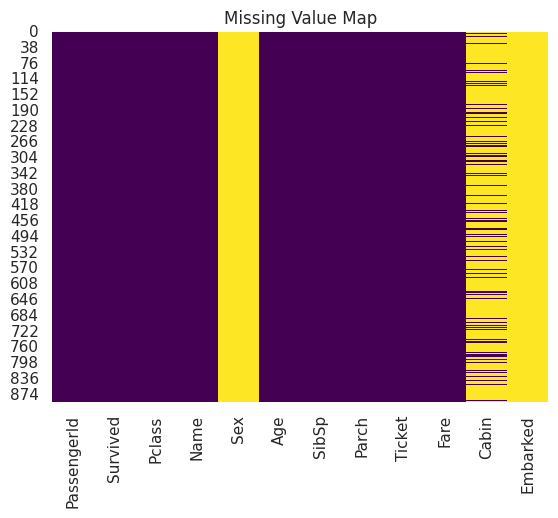

In [18]:
# Cek missing value
df.isnull().sum()

# Visualisasi missing value
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Value Map')
plt.show()


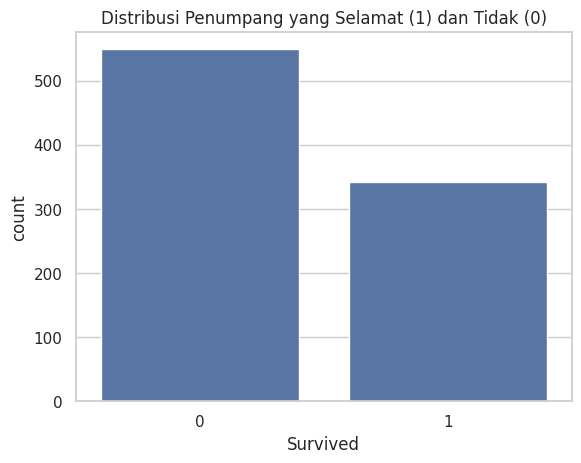

In [19]:
# Distribusi survival
sns.countplot(data=df, x='Survived')
plt.title('Distribusi Penumpang yang Selamat (1) dan Tidak (0)')
plt.show()


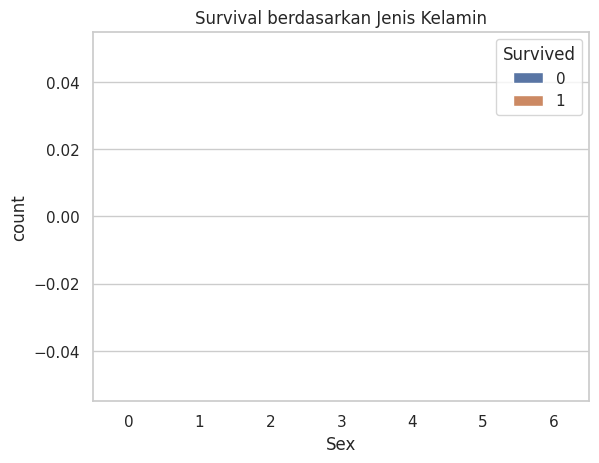

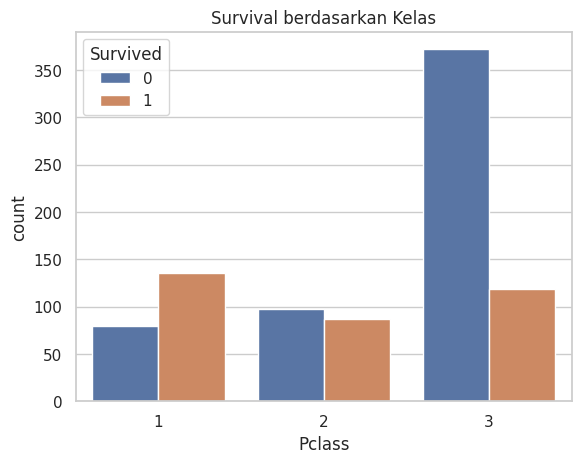

In [20]:
# Analisis berdasarkan jenis kelamin
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival berdasarkan Jenis Kelamin')
plt.show()

# Analisis berdasarkan kelas
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival berdasarkan Kelas')
plt.show()


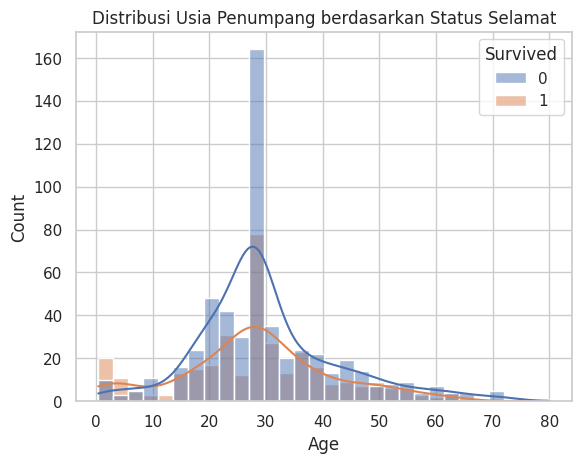

In [21]:
# Distribusi usia berdasarkan survival
sns.histplot(data=df, x='Age', hue='Survived', kde=True, bins=30)
plt.title('Distribusi Usia Penumpang berdasarkan Status Selamat')
plt.show()


# **3. Pemodelan Machine Learning Preprocessing**

In [23]:
from sklearn.preprocessing import LabelEncoder

# Salin data
data = df.copy()

# Mengisi nilai kosong pada kolom Age dengan median
data['Age'] = data['Age'].fillna(data['Age'].median())

# Drop kolom yang tidak digunakan
data = data.drop(columns=['Cabin', 'Name', 'Ticket', 'Embarked'])

# Encode jenis kelamin
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])  # male:1, female:0

# Cek data final
data.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,0,35.0,0,0,8.0500


In [31]:
# Pisahkan fitur dan label
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Prediksi
y_pred = model.predict(X_test_scaled)


Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


Confusion Matrix:


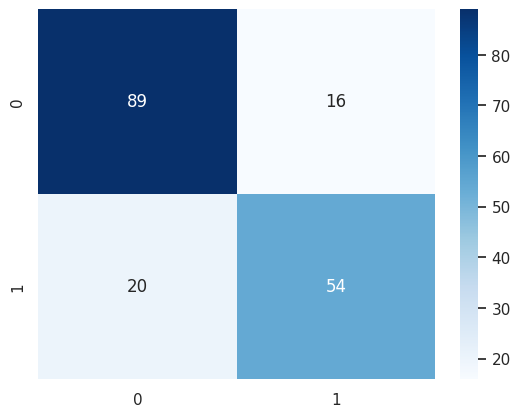

F1 Score: 0.7500


In [28]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")


# **ALASAN MODEL**

Kami memilih algoritma **Random Forest** karena:

- Mampu menangani data kategorikal dan numerik
- Tidak terlalu sensitif terhadap outlier atau missing value setelah di-handle
- Dapat memberikan informasi pentingnya fitur (feature importance)
- Biasanya memiliki performa sangat baik di data tabular


# **4.WAWASAN MENDALAM**

* Data menunjukkan bahwa jenis kelamin memberikan dampak signifikan terhadap

* keselamatan; penumpang wanita lebih sering ditemukan selamat.

* Kelas penumpang menjadi indikator penting, dengan penumpang kelas satu memiliki tingkat keselamatan tertinggi.

* Usia berperan sedang, dimana anak-anak memiliki kecenderungan lebih besar untuk diselamatkan terlebih dahulu.

* Hubungan keluarga di atas kapal, tercermin pada variabel 'SibSp' dan 'Parch', turut memengaruhi keselamatan, namun tidak sekuat pengaruh gender atau kelas.



# **5.KESIMPULAN**

Dari hasil analisis terhadap data Titanic, kita berhasil membangun model prediksi menggunakan algoritma Random Forest yang mampu memberikan performa akurasi serta F1-score yang memuaskan. Dari keseluruhan fitur yang dianalisis, variabel jenis kelamin, kelas penumpang, dan usia muncul sebagai faktor paling berpengaruh dalam menentukan kemungkinan seseorang untuk selamat. Studi ini memperlihatkan bagaimana pendekatan machine learning dapat dimanfaatkan untuk menggali pola keselamatan sekaligus mendukung proses pengambilan keputusan dalam kondisi darurat. Sebagai tindak lanjut, penelitian serupa dapat diperluas melalui teknik feature engineering maupun dengan mengintegrasikan data eksternal agar model prediktif yang dihasilkan menjadi semakin kuat dan informatif.